In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import matplotlib 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from distgen.generator import Generator

Distribution format: gpt
Output file: gpt.particles.gdf

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 1 nC.
   Number of macroparticles: 20000.
   Assuming cylindrical symmetry...
   r distribution: SuperGaussianRad
      lambda = 5.65685 mm, power = INF
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: Super Gaussian
      sigma_t = 25 ps, power = INF
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 276.857 eV/c
   py distribution: Gaussian
      avg_py = 0 eV/c, sigma_py = 276.857 eV/c
   pz distribution: Gaussian
      avg_pz = 0 eV/c, sigma_pz = 276.857 eV/c
   Shifting avg_x = -0.000682859 mm -> 0 mm
   Scaling sigma_x = 3.99985 mm -> 4 mm
   Shifting avg_y = -0.000113737 mm -> 0 mm
   Scaling sigma_y = 4.00055 mm -> 4 mm
   Shifting avg_px = -0.171177 eV/c -> 0 eV/c
   Scaling sigma_px = 276.831 eV/c -> 276.857 eV/c
   Shifting avg_py = -0.238134 eV/c -> 0 eV/c
   Scaling sigma_

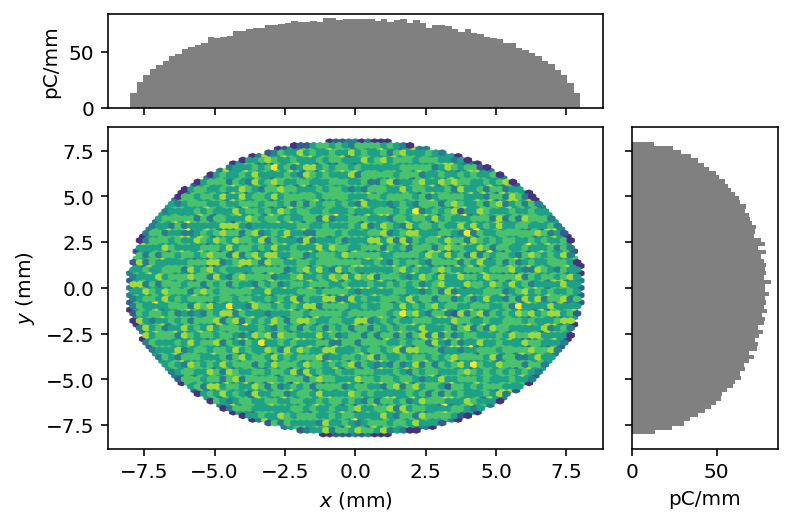

In [3]:
gen = Generator('templates/cu_injector/distgen.in.yaml', verbose=True)
gen.run()
gen.particles.plot('x', 'y')

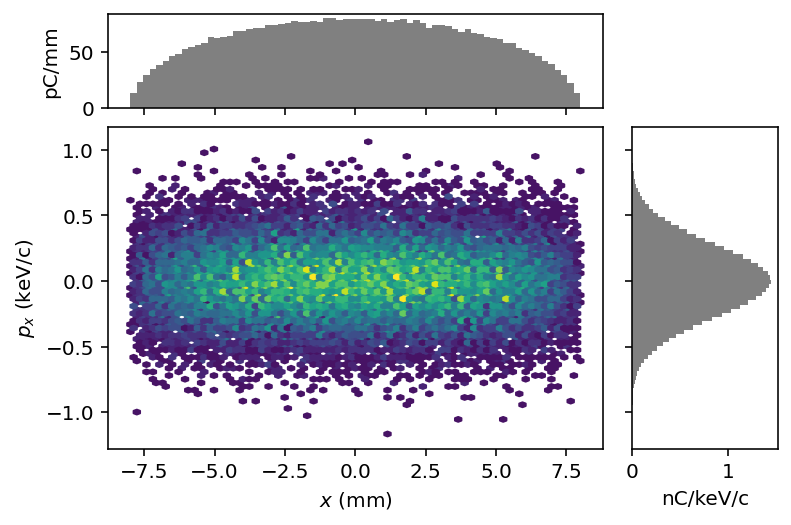

In [4]:
gen.particles.plot('x', 'px')

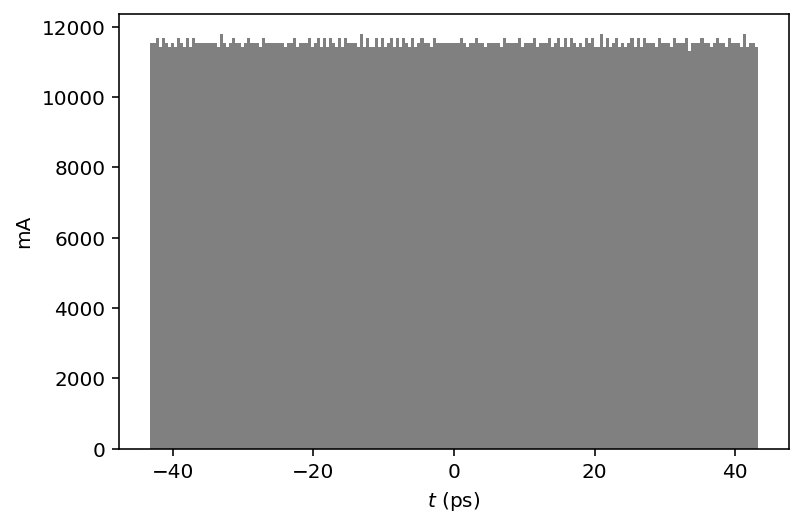

In [5]:
gen.particles.plot('t')

# Run with Distgen

In [6]:
from gpt.gpt_distgen import run_gpt_with_distgen

In [7]:
settings={'n_particle':200, 
          'Ntout':500,
          'gun_voltage':400,
          'buncher_voltage':50,
          'phiCTB01_off':-90, 
          'cavity_1_voltage':1000,
          'cavity_2_voltage':1000,
          'cavity_3_voltage':1000,
          'cavity_4_voltage':1000,
          'cavity_5_voltage':1000,
          'A3Quad_1_current':3,
          'A3Quad_2_current':-3,
          'A3Quad_3_current':3
         }

G = run_gpt_with_distgen(settings,
                         gpt_input_file='templates/cu_injector/gpt.in',
                         distgen_input_file='templates/cu_injector/distgen.in.yaml',
                         verbose=True,
                         auto_phase=True,)
                         #workdir='templates/cu_injector/temp',
                         #use_tempdir=False)

print(G)

Run GPT with Distgen:
Could no parse: Map2D_B("wcs", XSLA01,YSLA01,ZSLA01,  cos(THXSLA01),0,sin(THXSLA01), 0,1,0, "fields/solenoid_SLA_L60.gdf", "R", "Z", "Br", "Bz", BSLA01);
Could not parse z-position for mline
Could no parse: Map1D_TM("wcs", 0, 0, ZCTC02, 1,0,0, 0,-1,0, "fields/icm_1d.gdf", "z", "Ez", -ECTC02, phiCTC02, 2*pi*Master_RF);
Could not parse z-position for mline
Could no parse: Map1D_TM("wcs", 0, 0, ZCTC03, 1,0,0, 0,1,0, "fields/icm_1d.gdf", "z", "Ez", ECTC03, phiCTC03, 2*pi*Master_RF);
Could not parse z-position for mline
Could no parse: Map1D_TM("wcs", 0, 0, ZCTC04, 1,0,0, 0,-1,0, "fields/icm_1d.gdf", "z", "Ez", -ECTC04, phiCTC04, 2*pi*Master_RF);
Could not parse z-position for mline
Could no parse: Map1D_TM("wcs", 0, 0, ZCTC05, 1,0,0, 0,1,0, "fields/icm_1d.gdf", "z", "Ez", ECTC05, phiCTC05, 2*pi*Master_RF);
Could not parse z-position for mline
Could no parse: Map25D_TM("wcs",   XMLC01, 0,  ZMLC01,   nz_MLC, 0, -nx_MLC, 0, 1, 0, "fields/mlc_scott_2D.gdf",  "r", "z", "Er

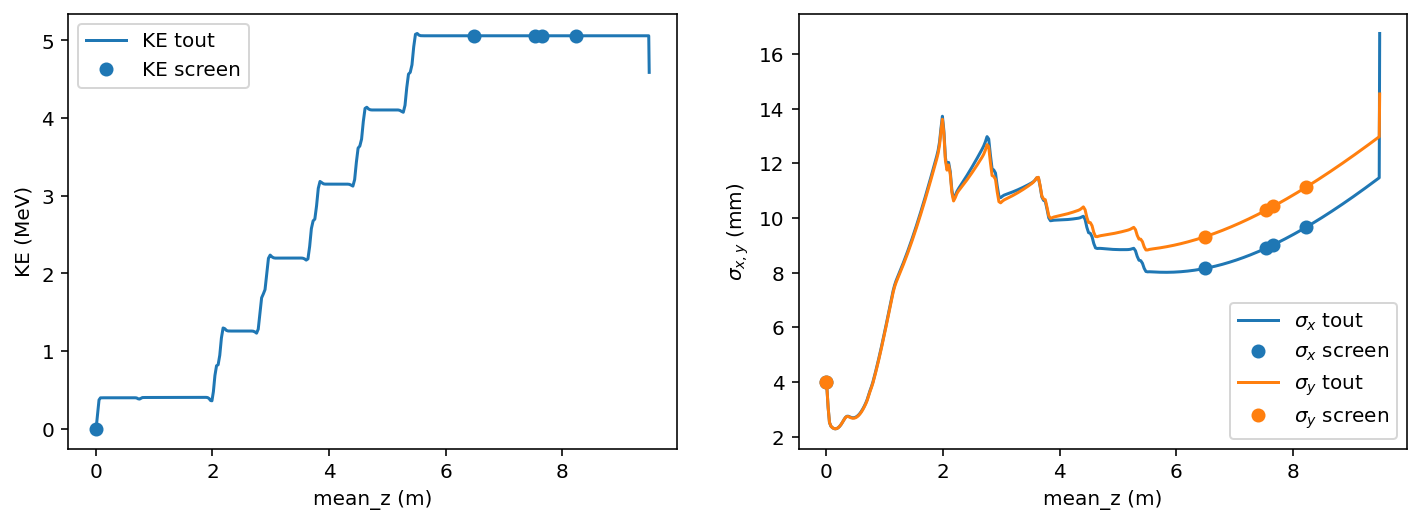

In [8]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

tzs = G.stat('mean_z','tout')
tstdx = G.stat('sigma_x','tout')
tstdy = G.stat('sigma_y','tout')
tKE = G.stat('mean_kinetic_energy','tout')

pzs = G.stat('mean_z','screen')
pstdx = G.stat('sigma_x','screen')
pstdy = G.stat('sigma_y','screen')
pKE = G.stat('mean_kinetic_energy','screen')

ax[0].plot(tzs, tKE/1e6, pzs, pKE/1e6, 'o', color='#1f77b4')
ax[0].set_xlabel('mean_z (m)');
ax[0].set_ylabel('KE (MeV)');
ax[0].legend(['KE tout','KE screen'])

ax[1].plot(tzs, tstdx*1e3, pzs, pstdx*1e3, 'o', color='#1f77b4')
ax[1].plot(tzs, tstdy*1e3, pzs, pstdy*1e3, 'o', color='#ff7f0e')         
ax[1].set_xlabel('mean_z (m)');
ax[1].set_ylabel('$\sigma_{x,y}$ (mm)');
ax[1].legend(['$\sigma_x$ tout','$\sigma_x$ screen','$\sigma_y$ tout','$\sigma_y$ screen']);

In [9]:
from gpt.gpt_distgen import evaluate_gpt_with_distgen

result = evaluate_gpt_with_distgen(settings=settings,
                                   gpt_input_file='templates/cu_injector/gpt.in',
                                   distgen_input_file='templates/cu_injector/distgen.in.yaml',
                                   verbose=True,
                                   auto_phase=True)

Run GPT with Distgen:
Could no parse: Map2D_B("wcs", XSLA01,YSLA01,ZSLA01,  cos(THXSLA01),0,sin(THXSLA01), 0,1,0, "fields/solenoid_SLA_L60.gdf", "R", "Z", "Br", "Bz", BSLA01);
Could not parse z-position for mline
Could no parse: Map1D_TM("wcs", 0, 0, ZCTC02, 1,0,0, 0,-1,0, "fields/icm_1d.gdf", "z", "Ez", -ECTC02, phiCTC02, 2*pi*Master_RF);
Could not parse z-position for mline
Could no parse: Map1D_TM("wcs", 0, 0, ZCTC03, 1,0,0, 0,1,0, "fields/icm_1d.gdf", "z", "Ez", ECTC03, phiCTC03, 2*pi*Master_RF);
Could not parse z-position for mline
Could no parse: Map1D_TM("wcs", 0, 0, ZCTC04, 1,0,0, 0,-1,0, "fields/icm_1d.gdf", "z", "Ez", -ECTC04, phiCTC04, 2*pi*Master_RF);
Could not parse z-position for mline
Could no parse: Map1D_TM("wcs", 0, 0, ZCTC05, 1,0,0, 0,1,0, "fields/icm_1d.gdf", "z", "Ez", ECTC05, phiCTC05, 2*pi*Master_RF);
Could not parse z-position for mline
Could no parse: Map25D_TM("wcs",   XMLC01, 0,  ZMLC01,   nz_MLC, 0, -nx_MLC, 0, 1, 0, "fields/mlc_scott_2D.gdf",  "r", "z", "Er

In [10]:
result

{'error': False,
 'end_n_particle': 200,
 'end_norm_emit_x': 0.00019468936331511373,
 'end_norm_emit_y': 0.00020645392829334808,
 'end_higher_order_energy_spread': 44462.83817292989,
 'end_mean_x': -8.609174017850327e-05,
 'end_sigma_x': 0.009679386868202603,
 'end_min_x': -0.025473407592063273,
 'end_max_x': 0.025931245632365627,
 'end_mean_y': -3.2804539412004972e-06,
 'end_sigma_y': 0.011138208468225353,
 'end_min_y': -0.028123638119423814,
 'end_max_y': 0.031164121614002154,
 'end_mean_z': 8.227999999999996,
 'end_sigma_z': 3.6339416001636205e-15,
 'end_min_z': 8.227999999999998,
 'end_max_z': 8.228000000000002,
 'end_mean_r': 0.011965122956495646,
 'end_sigma_r': 0.008636751311171685,
 'end_min_r': 9.96322062741797e-06,
 'end_max_r': 0.035798057563644486,
 'end_mean_theta': 0.0917960618784433,
 'end_sigma_theta': 1.7772029089977557,
 'end_min_theta': -3.105506950016675,
 'end_max_theta': 3.139085648615573,
 'end_mean_px': -84.6281794150862,
 'end_sigma_px': 12235.97023982477,
 'en